# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rizal Naufal Robbani
- **Email:** rizal.naufal@mhs.itenas.ac.id
- **ID Dicoding:** rizalnr

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [65]:
day_df = pd.read_csv("https://raw.githubusercontent.com/RizalNR03/Proyek-Analisis-Data-Bike-Sharing/main/data/day.csv")
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [66]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/RizalNR03/Proyek-Analisis-Data-Bike-Sharing/main/data/hour.csv")
hour_df.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Assessing Data

Menilai tabel day_df

In [67]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Type dteday seharusnya datetime bukan object

In [68]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing value

In [69]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi

In [70]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada inaccurate value

menilai tabel hour_df

In [71]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


type dteday seharusnya datetime bukan object

In [72]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing value

In [73]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


tidak ada duplikasi

In [74]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak ada missing value

### Cleaning Data

Mengganti type data di tabel day

In [75]:
datetime_columns_day =['dteday']

for column in datetime_columns_day:
  day_df[column] = pd.to_datetime(day_df[column])

In [76]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengganti type data di tabel hour

In [77]:
datetime_columns_hour =['dteday']

for column in datetime_columns_hour:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [78]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

Explore day_df

In [79]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
50,51,2011-02-20,1,0,2,0,0,0,1,0.285217,0.277330,0.407826,0.223235,639,1173,1812
684,685,2012-11-15,4,1,11,0,4,1,2,0.321667,0.324492,0.620417,0.152987,320,5125,5445
661,662,2012-10-23,4,1,10,0,2,1,1,0.544167,0.530304,0.641667,0.094546,841,6625,7466
708,709,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228
548,549,2012-07-02,3,1,7,0,1,1,1,0.781667,0.702038,0.447083,0.195267,904,5323,6227


Explore hour_df

In [80]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3237,3238,2011-05-19,2,0,5,19,0,4,1,1,0.58,0.5455,0.60,0.1343,65,345,410
16173,16174,2012-11-11,4,1,11,15,0,0,0,1,0.56,0.5303,0.37,0.2239,304,420,724
11733,11734,2012-05-09,2,1,5,2,0,3,1,3,0.56,0.5303,0.88,0.4478,0,1,1
6827,6828,2011-10-17,4,0,10,1,0,1,1,1,0.56,0.5303,0.54,0.3881,2,15,17
14150,14151,2012-08-17,3,1,8,19,0,5,1,2,0.74,0.2424,0.55,0.3881,88,403,491


Menggabungkan antara day_df dan hour_df

In [81]:
bike_sharing_df = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_d', '_h'))
bike_sharing_df.tail()

,instant_d,dteday,season_d,yr_d,mnth_d,holiday_d,weekday_d,workingday_d,weathersit_d,temp_d,...,weekday_h,workingday_h,weathersit_h,temp_h,atemp_h,hum_h,windspeed_h,casual_h,registered_h,cnt_h
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [82]:
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

bike_sharing_df['season_labels'] = bike_sharing_df['season_d'].map(season_labels)

In [83]:
bike_sharing_df.groupby('season_labels')['cnt_d'].mean().reset_index().sort_values('cnt_d')

,season_labels,cnt_d
1,Spring,2635.348185
3,Winter,4765.366021
2,Summer,4995.253119
0,Fall,5654.093194


In [84]:
weather_labels = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}
bike_sharing_df['weather_label'] = bike_sharing_df['weathersit_d'].map(weather_labels)

In [85]:
bike_sharing_df.groupby('weather_label')['cnt_d'].mean().reset_index().sort_values('cnt_d')

,weather_label,cnt_d
1,"Light Snow, Light Rain + Thunderstorm + Scatte...",1914.700855
2,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",4062.717595
0,"Clear, Few clouds, Partly cloudy, Partly cloudy",4895.177083


In [86]:
bike_sharing_df.groupby('mnth_d')['cnt_d'].mean().reset_index()

,mnth_d,cnt_d
0,1,2228.370189
1,2,2671.260999
2,3,3709.164969
3,4,4484.418928
4,5,5349.774194
5,6,5772.366667
6,7,5563.677419
7,8,5689.239322
8,9,5772.107864
9,10,5319.965541


In [87]:
bike_sharing_df.groupby('hr')['cnt_h'].mean().reset_index().sort_values('cnt_h')

,hr,cnt_h
4,4,6.352941
3,3,11.727403
5,5,19.889819
2,2,22.869930
1,1,33.375691
0,0,53.898072
6,6,76.044138
23,23,87.831044
22,22,131.335165
21,21,172.314560


In [88]:
bike_sharing_df.cnt_h.sum()

3292679

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana keterlibatan musim dengan jumlah penyewaan sepeda setiap harinya?

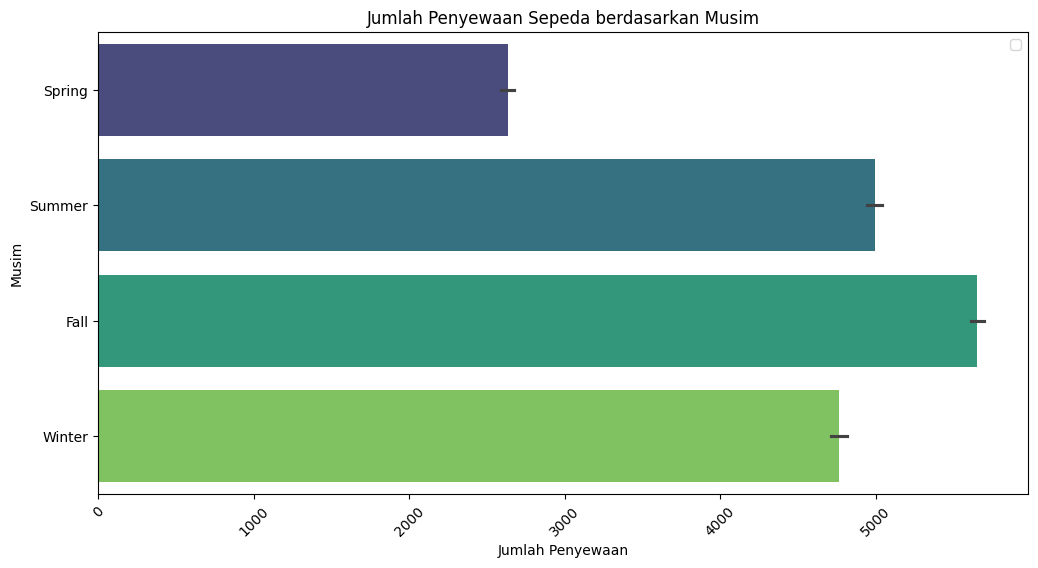

In [89]:
plt.figure(figsize=(12, 6))

sns.barplot(x='cnt_d', y='season_labels', data=bike_sharing_df, hue='season_labels', palette='viridis', dodge=False)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Musim')
plt.xticks(rotation=45)
plt.legend([])

plt.show()


### Pertanyaan 2: Apakah cuaca mempengaruhi penyewaan sepeda?

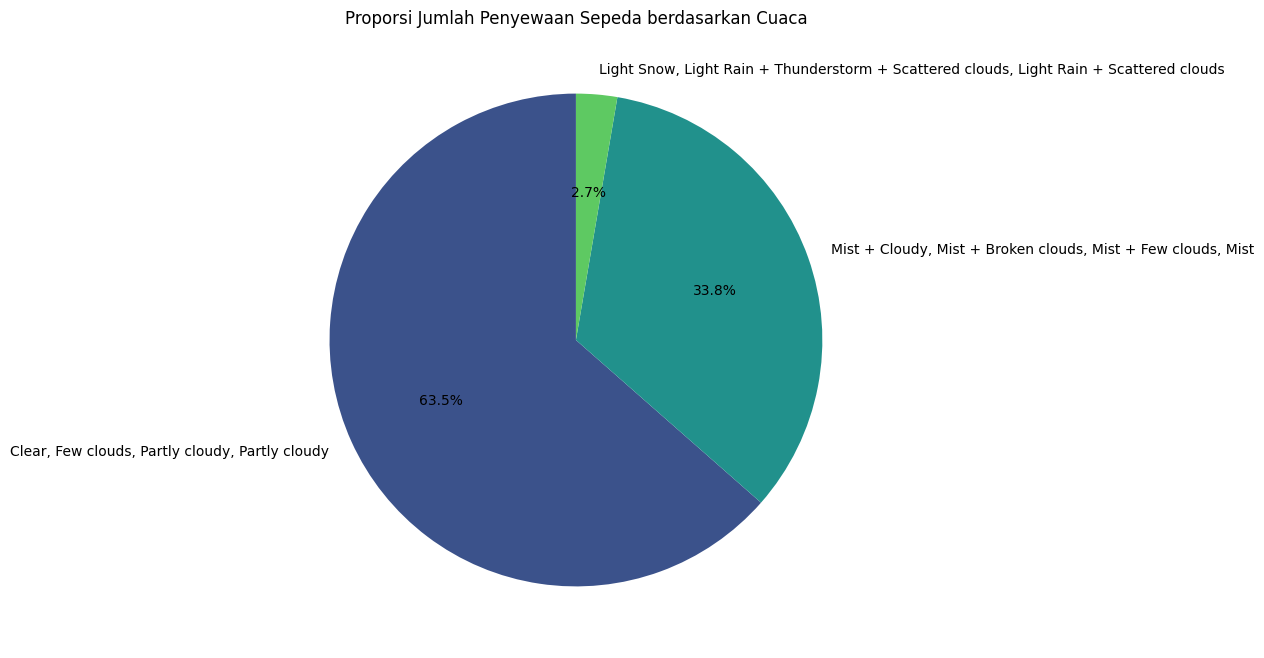

In [90]:
plt.figure(figsize=(8, 8))

weather_counts = bike_sharing_df['weather_label'].value_counts()
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(weather_counts)))
plt.title('Proporsi Jumlah Penyewaan Sepeda berdasarkan Cuaca')

plt.show()

### Pertanyaan 3: Berapa jumlah rata-rata persewaan sepeda per bulan?

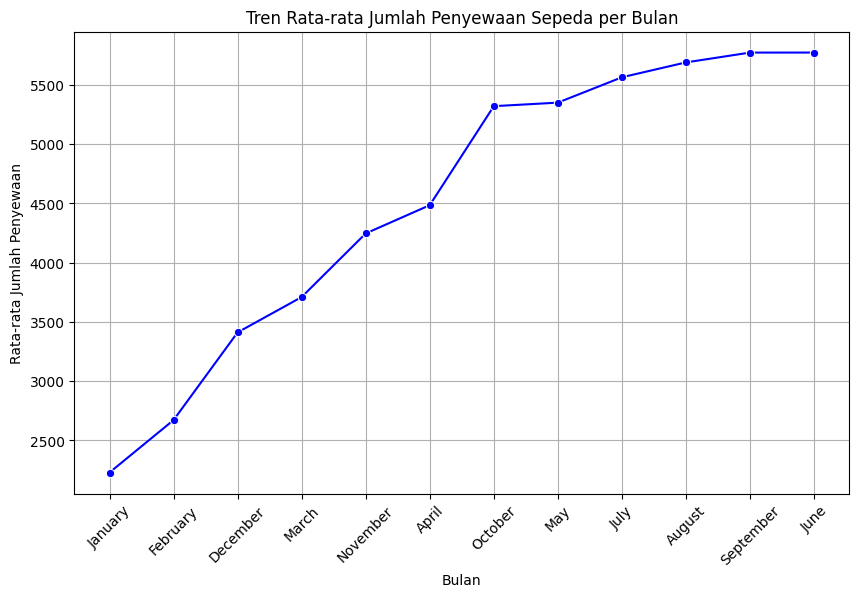

In [95]:
month_map = {
1: 'January',
2: 'February',
3: 'March',
4: 'April',
5: 'May',
6: 'June',
7: 'July',
8: 'August',
9: 'September',
10: 'October',
11: 'November',
12: 'December'
}

# Mengganti angka bulan dengan nama bulan dalam DataFrame
bike_sharing_df['mnth_d'] = bike_sharing_df['mnth_d'].map(month_map)

# Menghitung rata-rata jumlah penyewaan sepeda per bulan
monthly_avg = bike_sharing_df.groupby('mnth_d')['cnt_d'].mean().reset_index()
monthly_avg_sorted = monthly_avg.sort_values(by='cnt_d')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth_d', y='cnt_d', data=monthly_avg_sorted, marker='o', color='blue')
plt.title('Tren Rata-rata Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 4: Berapa jumlah rata-rata penyewaan sepeda per jam?

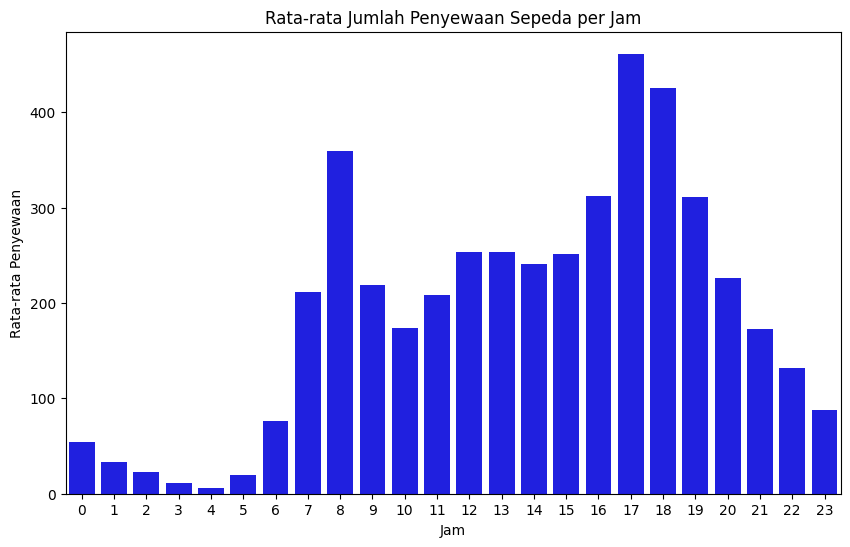

In [43]:
hourly_avg_rentals = bike_sharing_df.groupby('hr')['cnt_h'].mean().reset_index()
hourly_avg_rentals_sorted = hourly_avg_rentals.sort_values('cnt_h')

plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt_h', data=hourly_avg_rentals_sorted, color='blue')
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

## Conclusion

1. Bagaimana keterlibatan musim dengan jumlah penyewaan sepeda setiap harinya?


> **Konklusi** : Dari grafik diagram diatas, menunjukan bahwasannya dalam penyewaan sepeda itu ada keterlibatan dari segi musim, dan yang paling banyak menyewa sepeda itu disaat musim gugur.

2. Apakah cuaca mempengaruhi penyewaan sepeda?


> **Konklusi** : Sangat sangat mempengaruhi, dari diagram tersebut kita bisa melihat perbedaan yang signifikan, rata rata orang yang menyewa sepeda itu disaat cuaca sedang cerah atau sedikit berawan, faktor ini lah yang membuat kondisi yang lebih menyenangkan untuk kegiatan di luar ruangan, seperti bersepeda, dan orang-orang cenderung lebih memilih untuk menggunakan sepeda saat cuaca sedang cerah karena aktivitas mereka tidak akan terganggu oleh hujan atau kondisi cuaca yang kurang menguntungkan.

3. Berapa jumlah rata-rata penyewaan sepeda per bulan?


> **Konklusi :** Rata rata penyewaan sepeda perbulan itu paling banyak di bulan september dan juni yang bisa kita liat di diagram garis tersebut, dimana ada bulan bulan terentu yang penyewaannya itu sedikit dibandingkan bulan bulan yang lainnya, hal ini disebabkan adanya keterlibatan musim, seperti bulan september bertepan dengan musim gugur, dan bulan juni bertepatan dengan musim panas

4. Berapa jumlah rata-rata penyewaan sepeda per jam?


> **Konklusi :**Rata-rata orang menyewa sepeda pada pukul 8 pagi, pukul 5 sore, dan pukul 6 sore, ini bisa disebabkan oleh faktor cuaca dan musim. Di pukul 8 pagi orang orang menyewa sepeda untuk melakukan aktivitas olahraga, lalu di pukul 5 dan 6 sore orang orang menyewa sepeda untuk sekedar aktivitas rekreasi di luar ruangan atau mungkin bisa menjadi aktivitas olahraga saat selesai jam kerja.



